In [24]:
import os

nontumor_files=os.listdir("Original_dataset/IDC_regular_ps50_idx5/negative_IDC/")
tumor_files=os.listdir("IDC_regular_ps50_idx5/positive_IDC/")
neg_val_data=os.listdir("validate/negative_IDC/")
pos_val_data=os.listdir("validate/positive_IDC/")

# Separating the tumor negative images and grouping them as training, testing and validating data
# as groups of 300
for i in range(len(nontumor_files)):
    if i<300:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/negative_IDC/"+nontumor_files[i] +" train/negative_IDC/")
   
    elif i>=300 and i<600:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/negative_IDC/"+nontumor_files[i] +" test/negative_IDC/")
    else:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/negative_IDC/"+nontumor_files[i] +" validate/negative_IDC/")



# Separating the tumor positive images and grouping them as training, testing and validating data
# as groups of 300
for i in range(len(tumor_files)):
    if i<300:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/positive_IDC/"+tumor_files[i] + " train/positive_IDC/")
    elif i>=300 and i<600:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/positive_IDC/"+tumor_files[i] + " test/positive_IDC/")
    else:
        os.system("cp Original_dataset/IDC_regular_ps50_idx5/positive_IDC/"+tumor_files[i] + " validate/positive_IDC/")


#Increasing the training data

for z in range(len(neg_val_data)):
    if z<250:
        os.system("mv validate/negative_IDC/"+neg_val_data[z] +" train/negative_IDC/" )

for y in range(len(pos_val_data)):
    if z<250:
        os.system("mv validate/positive_IDC/"+pos_val_data[y] +" train/positive_IDC/")

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

In [67]:
# Specifying the rules

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True,
                                  vertical_flip=True,shear_range=0.2,zoom_range=0.2, 
                                  width_shift_range=0.2, height_shift_range=0.2,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory('train/',target_size=(50,50), batch_size=32,
                                                       class_mode='binary')

test_datagenerator = test_datagen.flow_from_directory('test/',target_size=(50,50), batch_size=32,
                                                      class_mode='binary')


model =Sequential([Conv2D(64,(3,3), activation='relu', padding='same', input_shape=(50,50,3)),
                  MaxPooling2D(pool_size=(2,2)),
            
                  Conv2D(128,(3,3), activation='relu',padding='same'),
                
                  MaxPooling2D(pool_size=(2,2)),
                         
                  Flatten() ,
                  Dense(128, activation='relu', kernel_regularizer=l2(0.001)) ,
                   
                  Dropout(0.5),
                  
                  Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))]
                        )


Found 850 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [68]:
model.compile(optimizer='adamW',metrics=['accuracy'],loss='binary_crossentropy',)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
#Train the model
history = model.fit(train_datagenerator, epochs=100, validation_data=test_datagenerator, callbacks=[early_stop])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6329 - loss: 0.8544 - val_accuracy: 0.7683 - val_loss: 0.6633
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7741 - loss: 0.5725 - val_accuracy: 0.7967 - val_loss: 0.5879
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8082 - loss: 0.4896 - val_accuracy: 0.8183 - val_loss: 0.4618
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8235 - loss: 0.4474 - val_accuracy: 0.8300 - val_loss: 0.4237
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.8318 - loss: 0.4202 - val_accuracy: 0.8283 - val_loss: 0.4345
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8329 - loss: 0.4294 - val_accuracy: 0.8000 - val_loss: 0.5203
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8329 - loss: 0.4325 - val_accuracy: 0.8433 - val_loss: 0.4128
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8329 - loss: 0.4260 - val_accuracy: 0.

In [6]:
model.save("Tumor_detector.keras")

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, image_path):
    img = image.load_img(image_path, target_size=(50, 50))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print("Predicted: Tumorous")
    else:
        print("Predicted: Negative")


In [45]:
validation_files=os.listdir("validate/positive_IDC/")
negative_validation_files=os.listdir("validate/negative_IDC/")


#for i in range(len(validation_files)):
#    print(i,predict_image(model, 'validate/positive_IDC/'+validation_files[i]))


for j in range(len(negative_validation_files)):
    print(j, predict_image(model, 'validate/negative_IDC/'+negative_validation_files[j]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted: Tumorous
0 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Tumorous
1 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Tumorous
2 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted: Tumorous
3 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: Tumorous
4 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Tumorous
5 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Tumorous
6 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted: Tumorous
7 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted: Tumorous
8 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: Tumorous
9 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: Tumorous
10 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: Tumorous
11 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted: Tumorous
12 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted: Tumorous
13 None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Tumorous
14 None
1/1 ━━━━━━━━━━━━━━━━

In [25]:
predictions1

{'10259_idx5_x1201_y1901_class1.png': None,
 '10257_idx5_x2051_y1601_class1.png': None,
 '10257_idx5_x1801_y1051_class1.png': None,
 '10260_idx5_x1251_y751_class1.png': None,
 '10260_idx5_x1501_y1101_class1.png': None,
 '10253_idx5_x751_y751_class1.png': None,
 '10254_idx5_x1651_y1601_class1.png': None,
 '10258_idx5_x851_y1201_class1.png': None,
 '10254_idx5_x1751_y1401_class1.png': None,
 '10253_idx5_x801_y601_class1.png': None,
 '10257_idx5_x1601_y1501_class1.png': None,
 '10260_idx5_x1251_y1201_class1.png': None,
 '10254_idx5_x1651_y1201_class1.png': None,
 '10256_idx5_x2101_y951_class1.png': None,
 '10253_idx5_x551_y451_class1.png': None}

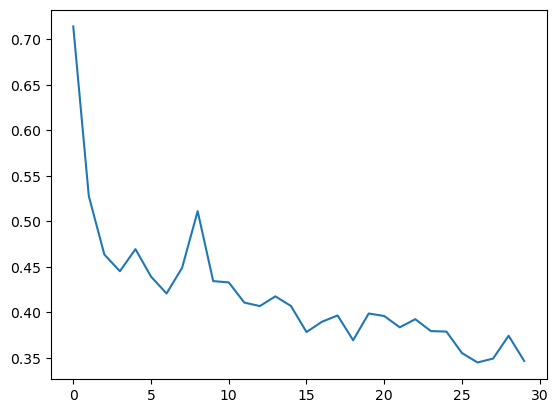

In [32]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])

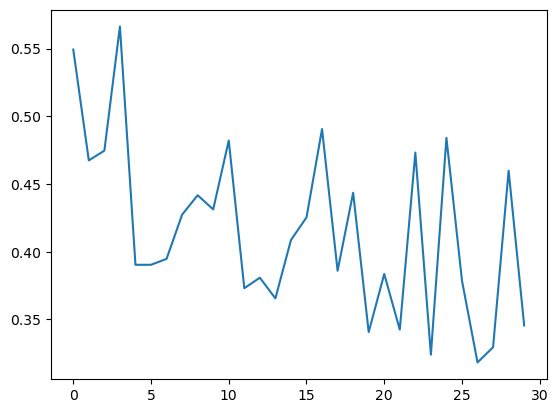

In [33]:
plt.plot(history.history['val_loss'])